### Import your librares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pfx


### Load your dataset

In [2]:
df=pd.read_csv("seattle_weather.csv")
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Handle missing data in PRCP and RAIN columns

In [3]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [4]:
df['RAIN'].unique()

array([True, False, nan], dtype=object)

In [5]:
df['PRCP'].unique()

array([0.47, 0.59, 0.42, 0.31, 0.17, 0.44, 0.41, 0.04, 0.12, 0.74, 0.01,
       0.  , 0.21, 0.1 , 0.22, 0.03, 0.2 , 0.14, 0.06, 0.56, 0.5 , 0.35,
       0.84, 0.13, 0.46, 0.11, 0.05, 0.98, 0.09, 0.19, 0.16, 0.08, 0.02,
       2.04, 0.4 , 0.33, 0.34, 0.54, 0.18, 0.37, 0.24, 0.7 , 0.27, 0.26,
       0.39, 0.29, 0.83, 0.88, 0.3 , 0.92, 0.76, 0.36, 0.07, 1.51, 0.66,
       0.15, 0.87, 0.43, 0.67, 0.49, 0.78, 0.25, 0.73, 0.52, 0.96, 1.83,
       0.32, 0.97, 0.6 , 0.28, 0.65, 0.23, 0.81, 1.17, 0.69, 1.38, 1.14,
       1.27, 0.95, 1.07, 1.46, 1.03, 0.79, 0.45, 0.8 , 2.08, 0.85, 1.05,
       0.61, 0.75, 1.2 , 0.99, 0.63, 0.53, 0.64, 1.13, 0.62, 0.68, 0.51,
       0.38, 0.82, 1.45, 2.98, 0.93, 0.77, 0.57, 1.  , 0.48, 0.58, 1.36,
       0.71, 1.26, 1.29, 1.65, 0.72, 1.19, 1.64, 1.23, 0.55, 1.15, 2.58,
       1.01, 2.18, 1.28, 1.12, 1.32, 1.93, 1.22, 0.89, 1.78, 0.86, 1.11,
       0.94, 1.08, 1.06, 1.04, 3.41, 1.34, 1.6 , 0.91, 1.54, 1.24, 1.16,
       1.55, 1.18, 1.21, 1.37, 1.31, 0.9 , 1.02, 1.

In [6]:
df['PRCP'].var()

0.05713603840671194

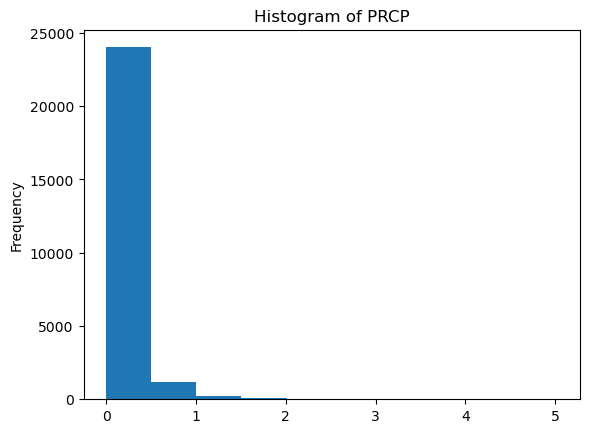

In [7]:
df['PRCP'].plot(kind="hist", title="Histogram of PRCP");

In [8]:
PRCP_mode = round(df['PRCP'].mode())
PRCP_mode

0    0.0
Name: PRCP, dtype: float64

In [9]:
df['PRCP'] =df['PRCP'].fillna(0.0)
df['PRCP'].isnull().sum()

0

In [10]:
df['PRCP'].var()

0.05713065433662097

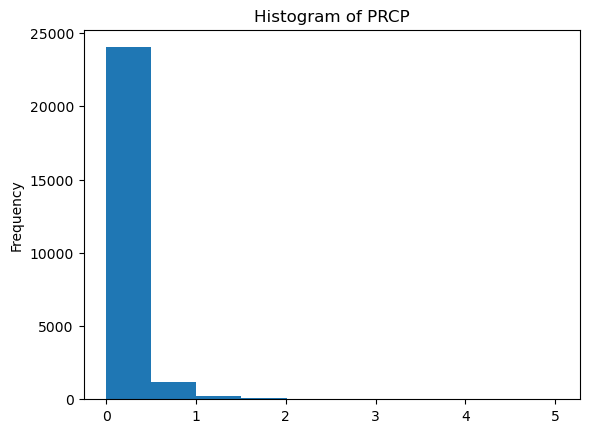

In [11]:
df['PRCP'].plot(kind="hist", title="Histogram of PRCP");

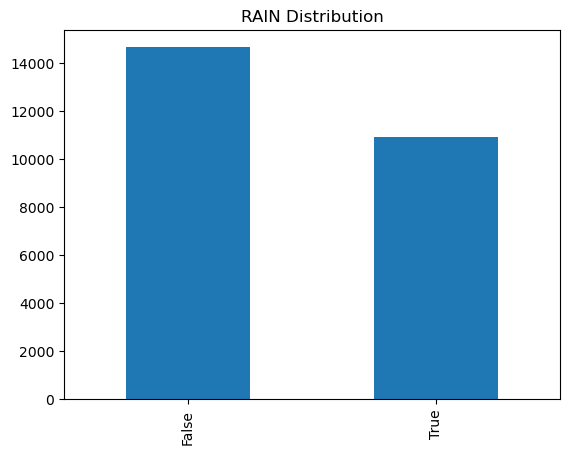

In [12]:
df['RAIN'].value_counts().plot(kind='bar', title="RAIN Distribution");

In [13]:
df['RAIN'].var()

0.24462904154362605

In [14]:
df['RAIN'] = np.where(df['PRCP']==0.0,df['RAIN'].fillna(False),df['RAIN'].fillna(True))

In [15]:
df['RAIN'].isnull().sum()

0

In [16]:
df['RAIN'].unique()

array([ True, False])

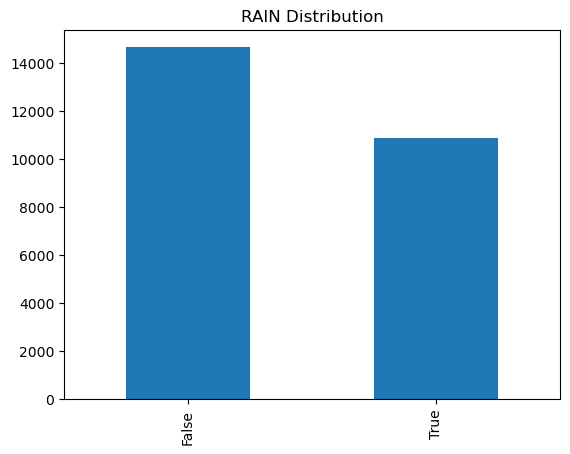

In [17]:
df['RAIN'].value_counts().plot(kind='bar', title="RAIN Distribution");

In [18]:
df['RAIN'].var()

0.24462168866671707

In [19]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


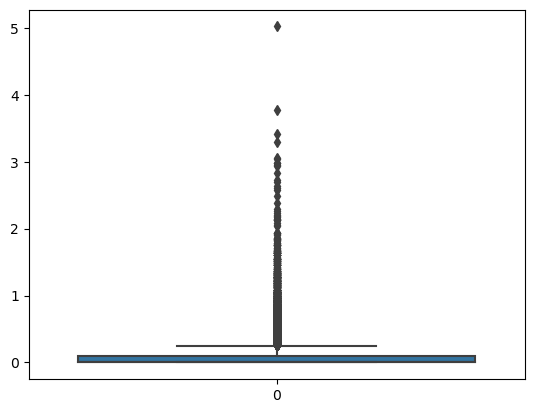

In [20]:
sns.boxplot(df['PRCP']);

In [21]:
Q1 = np.percentile(df['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


C:\Users\Sheikha\AppData\Local\Temp\ipykernel_11888\3978211186.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['PRCP'], 25, interpolation = 'midpoint')
C:\Users\Sheikha\AppData\Local\Temp\ipykernel_11888\3978211186.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['PRCP'], 75, interpolation = 'midpoint')


In [22]:
PRCP = df.drop(df[( df['PRCP']> 0.25)].index)

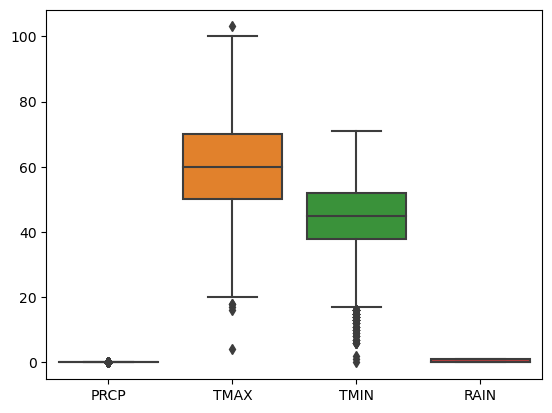

In [23]:
sns.boxplot(PRCP);

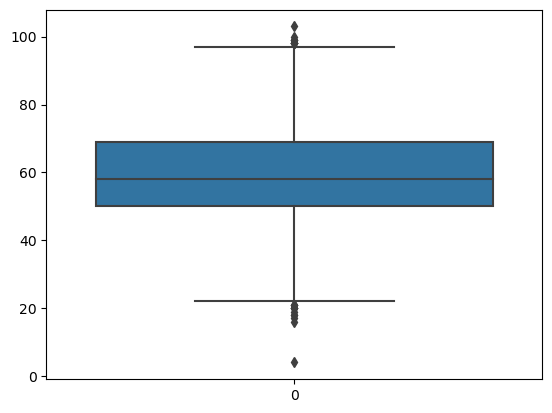

In [24]:
sns.boxplot(df ['TMAX']);

In [25]:
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  21.5
higher bound outliers 97.5


C:\Users\Sheikha\AppData\Local\Temp\ipykernel_11888\1725072702.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
C:\Users\Sheikha\AppData\Local\Temp\ipykernel_11888\1725072702.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')


In [26]:
TMAX = df.drop(df[( df['PRCP']> 0.25)|( df['TMAX']> 97.5) | (df['TMAX'] < 21.5)].index)

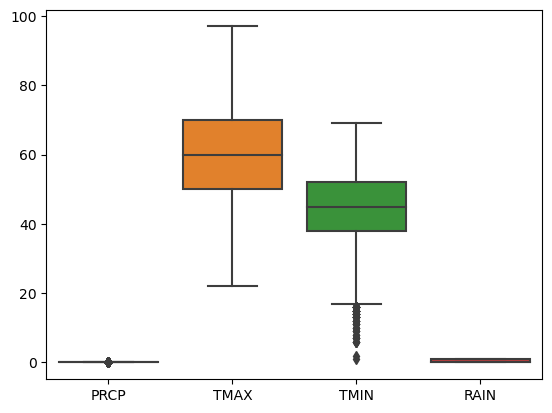

In [27]:
sns.boxplot(TMAX);

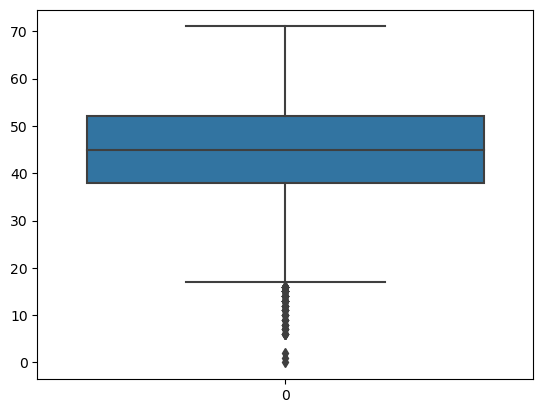

In [28]:
sns.boxplot(df ['TMIN']);

In [29]:
Q1 = np.percentile(df['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  17.0
higher bound outliers 73.0


C:\Users\Sheikha\AppData\Local\Temp\ipykernel_11888\3134730786.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['TMIN'], 25, interpolation = 'midpoint')
C:\Users\Sheikha\AppData\Local\Temp\ipykernel_11888\3134730786.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['TMIN'], 75, interpolation = 'midpoint')


In [30]:
TMIN = df.drop(df[(df['PRCP']> 0.25)|( df['TMAX']> 97.5) | (df['TMAX'] < 21.5)|(df['TMIN'] < 17.0)].index)

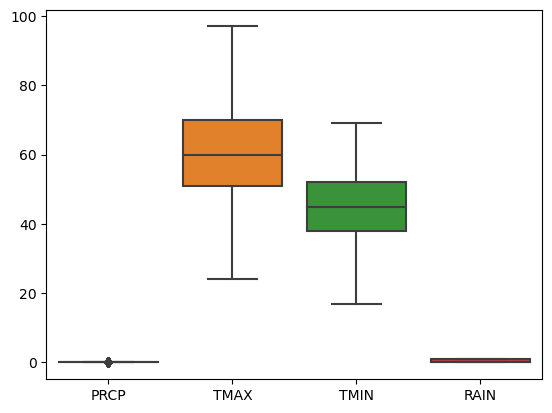

In [31]:
sns.boxplot(TMIN);